# HW 2

**Upload two files** to Gradescope: 
* `HW2.py` (which will be autograded)
* `HW2.ipynb` (run all cells to make sure that outputs are visible, especially plots)

**Reminder:** For the assignments in this course, **you must write your own code**. Copying code from the internet or other sources is not allowed. Using Python functions that have not been covered in class may make exercises easier than intended. Please ask if you are not sure what is allowed.

___

In [1]:
import math
import random
import numpy as np
import time
import matplotlib.pyplot as plt

### Asymptotic Notation

Let $f(n) = (\log n)^{10}$. Determine whether $f(n)$ is $$\Theta(g(n)),\quad O(g(n)),\quad o(g(n)),\quad \Omega(g(n)),\quad \omega(g(n))$$
for each of the following $g(n)$. Uncomment the statements below and assign the value of `True` or `False` to each variable. Justification is not necessary.

* $g_1(n) = n\log n$

In [2]:
f_is_Theta_g1 = False
f_is_Big_O_g1 = True
f_is_Little_o_g1 = True
f_is_Big_Omega_g1 = False
f_is_Little_omega_g1 = False

* $g_2(n) = \log n^{10}$

In [3]:
f_is_Theta_g2 = False
f_is_Big_O_g2 = False
f_is_Little_o_g2 = False
f_is_Big_Omega_g2 = True
f_is_Little_omega_g2 = True

* $g_3(n) = (\log n)^{9} + (\log n)^8$

In [4]:
f_is_Theta_g3 = False
f_is_Big_O_g3 = False
f_is_Little_o_g3 = False
f_is_Big_Omega_g3 = True
f_is_Little_omega_g3 = True

### Function Exceed Threshold
Suppose `func(n)` is a monotonically increasing function. We wish to find the largest integer `n` such that `func(n)` is less than or equal to a given threshold. (Assume the function exceeds the threshold for some `n`.)

**Version 1:** Write a function **`exceed_func1(func, thresh)`** that finds the largest `n` by examining the positive integers 1, 2, ..., in order, one at a time. 

Example:  
```
func = lambda n: n**3
exceed_func1(func, 10**6)
``` 
returns `100` because it is the largest integer that satisfies $n^3 \le 10^6$.

In [5]:
def exceed_func1(func, thresh):
    n = 1
    while func(n) <= thresh:
        n += 1
    
    return n - 1

In [6]:
func = lambda n: n**3
exceed_func1(func, 100)

4

In [7]:
func = lambda n: n**3
exceed_func1(func, 10**6)

100

**Version 2:** A quicker way to find the largest `n` is to first find the interval $\left[2^k, 2^{k+1}\right]$, bounded by consecutive powers of 2, that contains `n`, then examine only the integers in that interval. Assume $k\ge 1$. Write a function **exceed_func2(func, thresh)** that uses this method to return the answer.

In [8]:
def exceed_func2(func, thresh):
    # first find the interval bounded by powers of 2 that encloses n
    bound = 1
    while func(bound) <= thresh:
        bound *= 2
        
    low = bound // 2
    high = bound
    
    for n in range(low, high+1):
        if func(n) > thresh:
            break
    
    return n - 1

In [9]:
T_2 = lambda n: 10**6 * (n**(1/2))
exceed_func2(T_2, 10**6)

1

In [10]:
T_3 = lambda n: 100*n*math.log2(n)
exceed_func2(T_3, 10**6)

1002

In [11]:
func = lambda n: n**3
exceed_func2(func, 10**6)

100

In [12]:
func = lambda n: 6*n**0.5
exceed_func2(func, 10**4)

2777777

### Comparison of Input Sizes for Different $T(n)$ Functions
Suppose an algorithm can solve a problem in $T(n)$ microseconds for input size $n$. (A *microsecond* is a millionth of a second.) Each of the following $T(n)$ functions corresponds to the running time for an algorithm:

$$\begin{align*}
  T_1(n) &= n^3\\
  T_2(n) &= 10^6\sqrt n\\
  T_3(n) &= 100n\log_2(n)\\
  T_4(n) &= 10n^2\\
  T_5(n) &= n^2\log_2(n)\\
  T_6(n) &= (1.1)^n\\
  T_7(n) &= n!
\end{align*}$$

**For each $T(n)$, determine the largest input size $n$ that can be solved in 1 second, 1 minute, or 1 hour.**

Example: Consider $T_1(n)=n^3$. If $n\le 100$, then $T_1(n) \le 10^6$ microseconds, so the running time will be no more than 1 second. Similarly, if $n\le 391$, then $T_1(n) \le 60\cdot 10^6$ microseconds, so the running time will be no more than 1 minute.

**Write code to generate a table** like the one below, **calculating the missing entries** by calling `exceed_func2`. It is not necessary to exactly match the format of the table. (*Hint:* You may wish to use `math.log2()` and `math.factorial()`.)

```
  T(n)     1 second    1 minute      1 hour
--------------------------------------------
  T_1        100          391         
  T_2
  T_3
  T_4
  T_5
  T_6
  T_7
```



In [13]:
T_1 = lambda n: n**3
T_2 = lambda n: 10**6 * (n**(1/2))
T_3 = lambda n: 100*n*math.log2(n)
T_4 = lambda n: 10*n**2
T_5 = lambda n: n**2*math.log2(n)
T_6 = lambda n: 1.1**n
T_7 = lambda n: math.factorial(n)
func_lst = [T_1, T_2, T_3, T_4, T_5, T_6, T_7]

In [14]:
T_2(1) <= 10**6

True

In [15]:
n_dict = {}
i = 1
for T in func_lst:
    sec_n = exceed_func2(T, 10**6)
    min_n = exceed_func2(T, 60*10**6)
    hour_n = exceed_func2(T, 60*60*10**6)
    n_dict[f'T_{i}'] = (sec_n, min_n, hour_n)
    i += 1

In [16]:
print(f'  T(n)     1 second    1 minute      1 hour ')
print(f'--------------------------------------------')
for i in range(7):
    T_i = list(n_dict.keys())[i]
    print(f'  {T_i}   {n_dict[T_i][0]:8}      {n_dict[T_i][1]:8}     {n_dict[T_i][2]:8}')

  T(n)     1 second    1 minute      1 hour 
--------------------------------------------
  T_1        100           391         1532
  T_2          1          3600     12960000
  T_3       1002         39311      1736782
  T_4        316          2449        18973
  T_5        344          2316        16052
  T_6        144           187          230
  T_7          9            11           12


### Recursive Cumulative Sum
Write a recursive version of the cumulative sum function called **`cum_sum_rec(nums)`**. 

Note: Your function should work for small lists. It need not work for large lists which may generate a `RecursionError`. To find the maximum recursion depth for your version of Python, call
```
import sys
sys.getrecursionlimit() 
```

In [17]:
def cum_sum_rec(nums):
    if len(nums)==1:
        return nums
    
    return cum_sum_rec(nums[:-1]) + [nums[-1] + sum(nums[:-1])]

In [18]:
cum_sum_rec([7,8,9])

[7, 15, 24]

In [19]:
[7] + [15] + [24]

[7, 15, 24]

### A Recursively Defined Sequence
Consider the sequence $a_1 = a_2 = 2$, $a_n = a_{n-1} + 2a_{n-2}$. 

$$\{2, 2, 6, 10, \ldots \}$$

Write a recursive function **`seq_rec(n)`** to return the $n$th term of the sequence for $n\ge 1$. 

In [20]:
def seq_rec(n):
    if n<=2:
        return 2
    
    return seq_rec(n-1) + 2*seq_rec(n-2)

In [21]:
[seq_rec(n) for n in range(1,11)]

[2, 2, 6, 10, 22, 42, 86, 170, 342, 682]

Now write a non-recursive version of the function called **`seq(n)`**.

In [22]:
def seq(n):
    prev, curr = 2,2
    if n<=2:
        return curr
    
    for _ in range(n-2):
        prev, curr = curr, (2*prev+curr)
    
    return curr

In [23]:
[seq(n) for n in range(1,11)]

[2, 2, 6, 10, 22, 42, 86, 170, 342, 682]

### LR Curve

The **LR Curve** draws a path in the 2D plane consisting of one-unit horizontal and vertical segments. The curve begins in one of four directions (East, North, West, South), then changes directions by making Left (L) and Right (R) turns. Here is a sample curve.

<img src = "http://www.coloradomath.org/python/lr_curve_8.jpg" width="458" height="446" />

An **LR string** specifies the moves that draw an LR curve. It can be defined recursively using the following rules. Begin with 'L', then repeatedly do the following:
* Concatenate three strings: 
  * the current string
  * the letter 'L'
  * a second string which is identical to the current string except that the center character is flipped (from L to R or R to L).  

Note that these rules produce strings of odd length only. Here are the first few LR strings:
1. 'L'
2. 'L' + 'L' + 'R' $\rightarrow$ 'LLR'
3. 'LLR' + 'L' + 'LRR' $\rightarrow$ 'LLRLLRR'

and their corresponding images, starting with a segment pointing in the East direction:

<img src = "http://www.coloradomath.org/python/LRcurves.jpg" width="608" height="180"/>

For this exercise, the sequence of steps begin with 'L'. They can be adapted to begin with 'R' instead.

Write a **recursive** function **LR_string(string, reps)** that takes a string containing an odd number of Ls and Rs, and applies the above rules for the given number of repetitions.

Examples:<br>
`LR_string('L', 2)` returns `'LLRLLRR'`.<br>
`LR_string('LLR', 1)` returns `'LLRLLRR'`.<br>
`LR_string('L', 0)` returns `'L'`.


In [24]:
def LR_string(string, reps):
    if reps == 0:
        return string
    
    mid_pos = math.floor(len(string) / 2)
    new_str = ''
    for i in range(len(string)):
        if i == mid_pos:
            if string[i] == 'L':
                new_str += 'R'
            else:
                new_str += 'L'
        else:
            new_str += string[i]
            
    return LR_string((string + 'L' + new_str), (reps-1))

In [25]:
LR_string('L', 2)

'LLRLLRR'

In [26]:
LR_string('LLR', 1)

'LLRLLRR'

In [27]:
LR_string('L', 0)

'L'

Write a function called **LR_curve(LR, dir)** that takes an LR string as input and draws an LR Curve beginning in one of the 4 directions ('N', 'E', 'S', 'W'). The default direction is 'E'. The large image displayed above corresponds to  `LR_curve(LR_string('L', 8))`.

In [28]:
def LR_curve(LR, dir = 'E'):
    
    plt.figure(figsize=(10,10))
    dir_dict = {'E': [('N','S'), np.array([[0,1],[0,0]])], 'W': [('S','N'), np.array([[0,-1],[0,0]])],
               'N': [('W','E'), np.array([[0,0],[0,1]])], 'S': [('E','W'), np.array([[0,0],[0,-1]])]}
    
    xpos, ypos = 0, 0
    xvals = xpos + dir_dict[dir][1][0]
    yvals = ypos + dir_dict[dir][1][1]
    plt.plot(xvals,yvals, c='b')
    xpos, ypos = xvals[-1], yvals[-1]
    
    for lr in LR:
        lr_dir_tup = dir_dict[dir][0]   # set a new direction
        if lr == 'L':
            dir = lr_dir_tup[0]
        else:
            dir = lr_dir_tup[1]
            
        xvals = xpos + dir_dict[dir][1][0]   # plot a new line
        yvals = ypos + dir_dict[dir][1][1]
        plt.plot(xvals,yvals, c='b')
        xpos, ypos = xvals[-1], yvals[-1]
    
    plt.axis('equal')
    plt.axis('off')

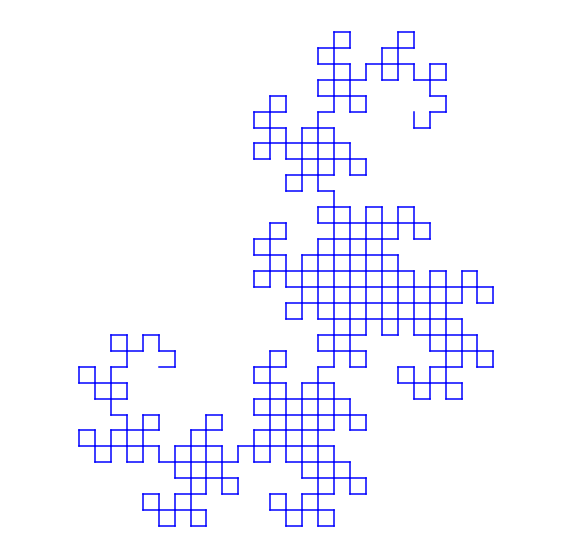

In [29]:
LR_curve(LR_string('L', 8))

**Draw the curve** `LR_curve(LR_string('L', 6), 'S')`.

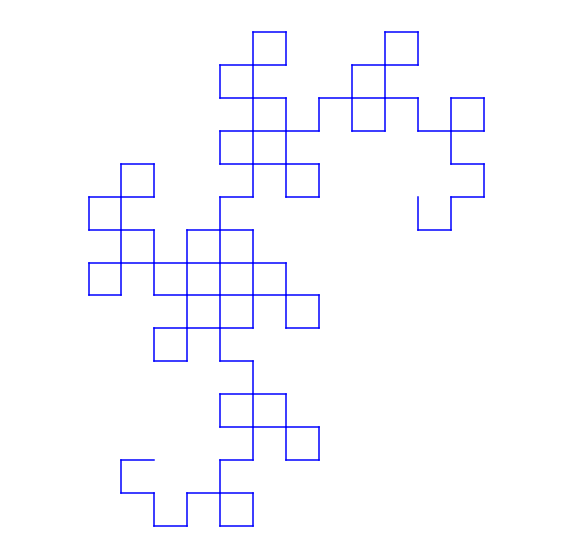

In [30]:
LR_curve(LR_string('L', 6), 'S')

**Draw the curve** `LR_curve(LR_string('L', 11))`.

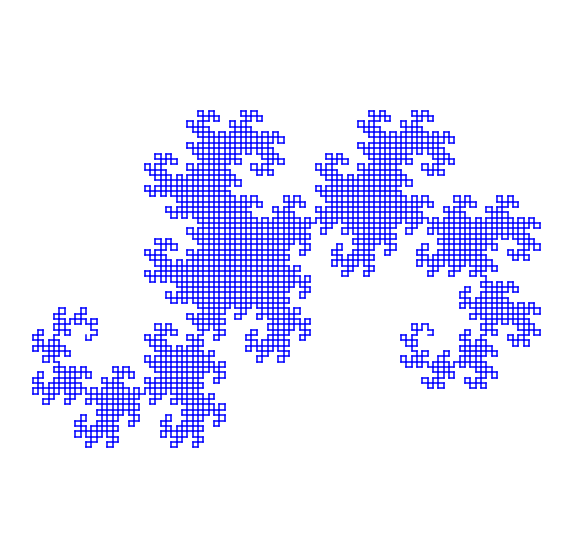

In [31]:
LR_curve(LR_string('L', 11))